In [3]:
import numpy as np
import caffe
from caffe.proto import caffe_pb2
import lmdb
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d
%matplotlib notebook

In [11]:
import sys
import os
import cPickle as pickle
import os
sys.path.append('libs/')
from lmdb_utils import *
from numpy.random import seed
from numpy.random import shuffle

In [5]:
#Fijar modo de caffe CPU
caffe.set_mode_cpu()

#Fijar modo de caffe GPU
#caffe.set_device(0)
#caffe.set_mode_gpu()

In [6]:
def load_CIFAR_batch(filename):
  """ load single batch of cifar """
  with open(filename, 'rb') as f:
    datadict = pickle.load(f)
    X = datadict['data']
    Y = datadict['labels']
    X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
    Y = np.array(Y)
    return X, Y

In [7]:
def load_CIFAR10(ROOT):
  """ load all of cifar """
  xs = []
  ys = []
  for b in range(1,6):
    f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
    X, Y = load_CIFAR_batch(f)
    xs.append(X)
    ys.append(Y)    
  Xtr = np.concatenate(xs)
  Ytr = np.concatenate(ys)
  del X, Y
  Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
  return Xtr, Ytr, Xte, Yte

# 1.- Preparar bases de datos

Descargar de fuente: https://www.cs.toronto.edu/~kriz/cifar.html

---------Entrenamiento---------
Dimensiones de la entrada: (50000, 32, 32, 3)
Dimensiones de las etiquetas: (50000,)
---------Validacion---------
Dimensiones de la entrada: (10000, 32, 32, 3)
Dimensiones de la etiqueta: (10000,)


<IPython.core.display.Javascript object>


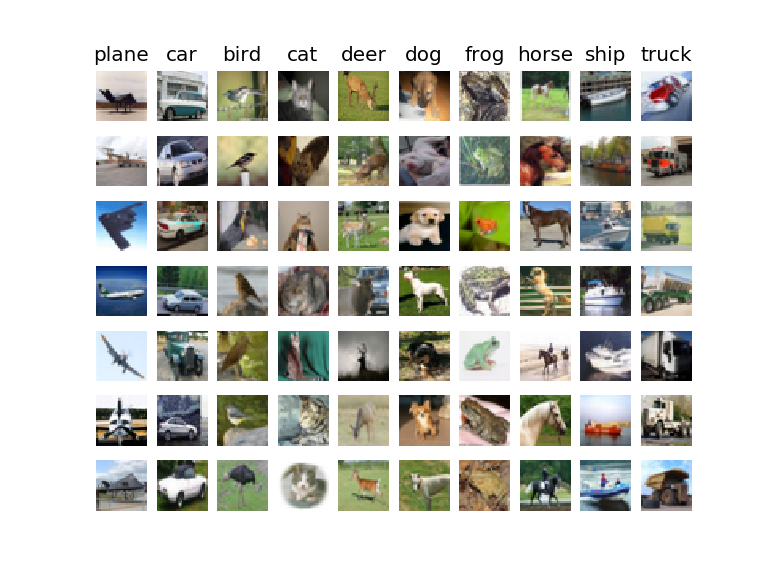

In [12]:
#Load the raw CIFAR-10 data.
cifar10_dir = 'dataset/cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

#Check size of the training and test data.
print('---------Entrenamiento---------')
print('Dimensiones de la entrada: ' + str(X_train.shape))
print('Dimensiones de las etiquetas: ' + str(y_train.shape))
print('---------Validacion---------')
print('Dimensiones de la entrada: ' + str(X_test.shape))
print('Dimensiones de la etiqueta: ' + str(y_test.shape))

#Imprimir ejemplos
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [13]:
#Redimensionar arreglos
X_train = np.transpose(X_train,(0,3,1,2))
X_test = np.transpose(X_test,(0,3,1,2))

#Generar bases de datos
create_lmdb_dataset('dataset/images_train_lmdb', X_train, y_train)
create_lmdb_dataset('dataset/images_test_lmdb', X_test, y_test)

122880000000
24576000000


Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)


<IPython.core.display.Javascript object>


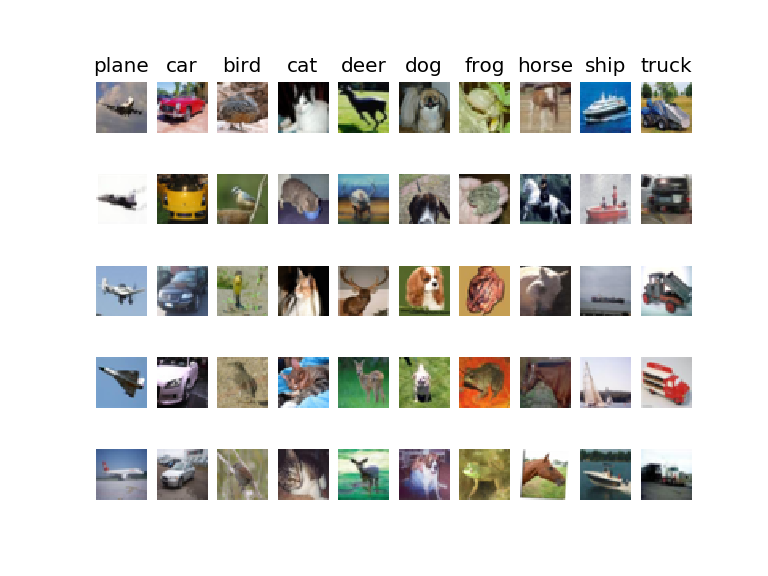

In [15]:
#Extraer datos de fuente lmdb
X_train, y_train = load_lmdb_dataset('dataset/images_train_lmdb', 50000, 3, 32, 32)

#Redimensionar a dimensiones de imagen
X_train = np.transpose(X_train,(0,2,3,1))

#Verificar dimensiones de la base de datos
print('Training data shape: ' + str(X_train.shape))
print('Training labels shape: ' +  str(y_train.shape))

#Print some examples
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 5
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

# 3.- Definir modelo

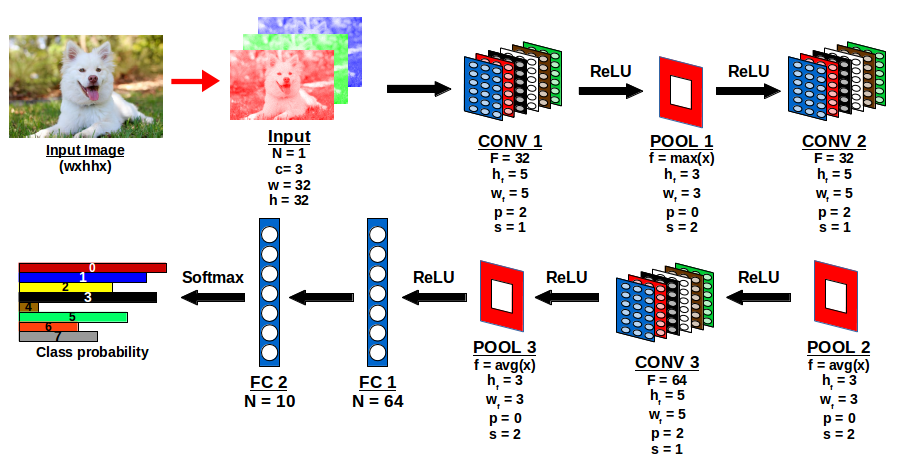

In [18]:
from IPython.display import Image
Image('model/CNN/network2.png')